# Instructor Do: Scikit-Learn Datasets

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
from tqdm import tqdm

In [2]:
# import some data to play with
# dataset = datasets.load_iris()
# dataset = datasets.load_wine()
dataset = datasets.load_breast_cancer()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
X = dataset.data
y = dataset.target

df = pd.DataFrame(X, columns=dataset.feature_names)
print(df.shape)
df["label"] = [dataset.target_names[i] for i in y]
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


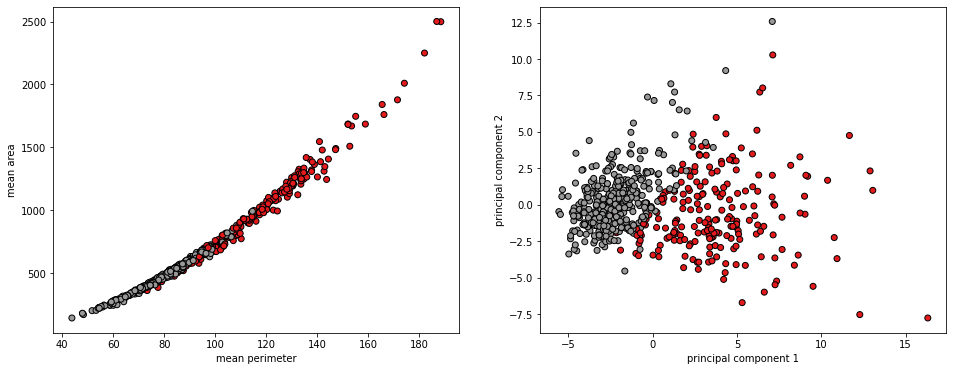

In [15]:
def get_data_label(idx):
    return X[:, idx], dataset.feature_names[idx]

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6))

# change index values!
x0_data, x0_label = get_data_label(2)
x1_data, x1_label = get_data_label(3)
# plot two raw axes
ax0.scatter(
    x0_data,
    x1_data,
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k"
)
ax0.set_xlabel(x0_label)
ax0.set_ylabel(x1_label)


# plot two principal components
Xt = X
# toggle this!
Xt = StandardScaler().fit_transform(Xt)
Xt = PCA(n_components=2).fit_transform(Xt)
ax1.scatter(
    Xt[:, 0],
    Xt[:, 1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k"
)
ax1.set_xlabel("principal component 1")
ax1.set_ylabel("principal component 2");

# Demo Link

Show how PCA could also be used to visualize model predictions using [this link](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

## K-means

In [16]:
pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=3)), # PCA(3) improves breast cancer
        ("kmeans", KMeans(n_clusters=len(dataset.target_names), random_state=0))
    ]
)

predictions = pipe.fit_predict(X)

clusters2labels = {
    i: Counter(predictions[y == i]).most_common(1)[0][0]
    for i in range(len(dataset.target_names))
}
print(clusters2labels)
predictions = np.array([clusters2labels[x] for x in predictions])
# print(predictions)
np.mean(predictions == y)
# print(y)

{0: 1, 1: 0}


0.9103690685413005

# Supervised

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

print("train ", Counter(y_train))
print("test ", Counter(y_test))

train  Counter({1: 239, 0: 142})
test  Counter({1: 118, 0: 70})


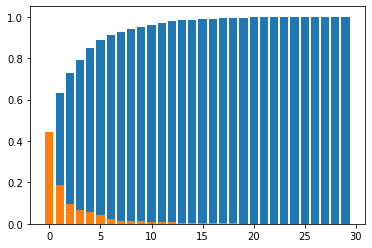

In [18]:
Xt = X
Xt = StandardScaler().fit_transform(Xt)
evr = PCA(n_components=X.shape[-1]).fit(Xt).explained_variance_ratio_
plt.bar(range(len(evr)), np.cumsum(evr))
plt.bar(range(len(evr)), evr);

In [27]:
scores = []
pca_n = list(range(1, X.shape[-1]+1))

for n_components in tqdm(pca_n):
    pipe = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_components)),
#             ("model", RandomForestClassifier(random_state=0)),
#             ("model", RandomForestClassifier(max_depth=2, random_state=0)),
            ("model", SVC(random_state=0)),
        ]
    )

    pipe.fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))

100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 119.80it/s]


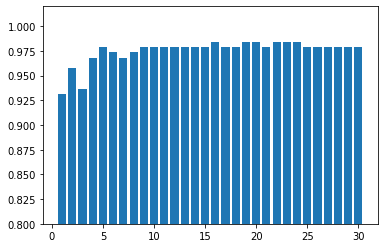

In [28]:
plt.bar(pca_n, scores);
plt.ylim([0.8, 1.02]);